In [85]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# import sys
# !conda list Check the packages installed

In [28]:
df = pd.read_csv('churn_clean.csv')

In [29]:
df.head()

CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     172.455519        904.536110     5   
1  48661  44.32893  -84.24080  ...     242.632554        800.982766     3   
2  97148  45.35589 -123.24657  ...     159.947583       2054.706961     4   
3  92014  32.96687 -117.24798  ...     119.956840       2164.579412     4   
4  77461  29.38012  -95.80673  ...     149.948316        271.493436     4   

  Item2  Item3  Item4  Item5 Item6 Item7 Item8  
0     5      5      3      4     4     3     4  
1     4      3      3      4     3     4     4  
2     4      2      4      4     3     3     3  
3     4      4      2      5     4     3     3  
4     4      4      3      4     4     4     5  

[5 rows x 50 columns]

In [30]:
df.shape

(10000, 50)

In [31]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [32]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [33]:
df.describe()

CaseOrder           Zip           Lat           Lng     Population  \
count  10000.00000  10000.000000  10000.000000  10000.000000   10000.000000   
mean    5000.50000  49153.319600     38.757567    -90.782536    9756.562400   
std     2886.89568  27532.196108      5.437389     15.156142   14432.698671   
min        1.00000    601.000000     17.966120   -171.688150       0.000000   
25%     2500.75000  26292.500000     35.341827    -97.082812     738.000000   
50%     5000.50000  48869.500000     39.395800    -87.918800    2910.500000   
75%     7500.25000  71866.500000     42.106908    -80.088745   13168.000000   
max    10000.00000  99929.000000     70.640660    -65.667850  111850.000000   

         Children           Age         Income  Outage_sec_perweek  \
count  10000.0000  10000.000000   10000.000000        10000.000000   
mean       2.0877     53.078400   39806.926771           10.001848   
std        2.1472     20.698882   28199.916702            2.976019   
min        0.0000     18.000000     348.670000            0.099747   
25%        0.0000     35.000000   19224.717500            8.018214   
50%        1.0000     53.000000   33170.605000           10.018560   
75%        3.0000     71.000000   53246.170000           11.969485   
max       10.0000     89.000000  258900.700000           21.207230   

              Email  ...  MonthlyCharge  Bandwidth_GB_Year         Item1  \
count  10000.000000  ...   10000.000000       10000.000000  10000.000000   
mean      12.016000  ...     172.624816        3392.341550      3.490800   
std        3.025898  ...      42.943094        2185.294852      1.037797   
min        1.000000  ...      79.978860         155.506715      1.000000   
25%       10.000000  ...     139.979239        1236.470827      3.000000   
50%       12.000000  ...     167.484700        3279.536903      3.000000   
75%       14.000000  ...     200.734725        5586.141369      4.000000   
max       23.000000  ...     290.160419        7158.981530      7.000000   

              Item2         Item3         Item4         Item5         Item6  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       3.505100      3.487000      3.497500      3.492900      3.497300   
std        1.034641      1.027977      1.025816      1.024819      1.033586   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        3.000000      3.000000      3.000000      3.000000      3.000000   
50%        4.000000      3.000000      3.000000      3.000000      3.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        7.000000      8.000000      7.000000      7.000000      8.000000   

              Item7         Item8  
count  10000.000000  10000.000000  
mean       3.509500      3.495600  
std        1.028502      1.028633  
min        1.000000      1.000000  
25%        3.000000      3.000000  
50%        4.000000      3.000000  
75%        4.000000      4.000000  
max        7.000000      8.000000  

[8 rows x 23 columns]

In [34]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature CaseOrder :10000
The number of values for feature Customer_id :10000
The number of values for feature Interaction :10000
The number of values for feature UID :10000
The number of values for feature City :6058
The number of values for feature State :52
The number of values for feature County :1620
The number of values for feature Zip :8583
The number of values for feature Lat :8563
The number of values for feature Lng :8630
The number of values for feature Population :5933
The number of values for feature Area :3 -- ['Rural' 'Suburban' 'Urban']
The number of values for feature TimeZone :25 -- ['America/Anchorage' 'America/Boise' 'America/Chicago' 'America/Denver'
 'America/Detroit' 'America/Indiana/Indianapolis' 'America/Indiana/Knox'
 'America/Indiana/Marengo' 'America/Indiana/Petersburg'
 'America/Indiana/Tell_City' 'America/Indiana/Vincennes'
 'America/Indiana/Winamac' 'America/Juneau' 'America/Kentucky/Louisville'
 'America/Los_Angeles' 'America/Meno

In [35]:
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', \
         'UID', 'City','County', 'Zip', 'Lat', 'Lng',\
         'County', 'Zip', 'Lat', 'Lng', 'TimeZone',\
        'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'], axis = 1)

In [36]:
df['Email']

0       10
1       12
2        9
3       15
4       16
        ..
9995    12
9996    15
9997    10
9998    14
9999    17
Name: Email, Length: 10000, dtype: int64

In [37]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature State :52
The number of values for feature Population :5933
The number of values for feature Area :3 -- ['Rural' 'Suburban' 'Urban']
The number of values for feature Job :639
The number of values for feature Children :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Age :72
The number of values for feature Income :9993
The number of values for feature Marital :5 -- ['Divorced' 'Married' 'Never Married' 'Separated' 'Widowed']
The number of values for feature Gender :3 -- ['Female' 'Male' 'Nonbinary']
The number of values for feature Churn :2 -- ['No' 'Yes']
The number of values for feature Outage_sec_perweek :9986
The number of values for feature Email :23 -- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
The number of values for feature Contacts :8 -- [0 1 2 3 4 5 6 7]
The number of values for feature Yearly_equip_failure :6 -- [0 1 2 3 4 6]
The number of values for feature Techie :2 -- ['No' 'Yes']
The n

State  Population      Area                                Job  Children  \
0    AK          38     Urban  Environmental health practitioner         0   
1    MI       10446     Urban             Programmer, multimedia         1   
2    OR        3735     Urban            Chief Financial Officer         4   
3    CA       13863  Suburban                          Solicitor         1   
4    TX       11352  Suburban                Medical illustrator         0   

   Age    Income    Marital  Gender Churn  ...  OnlineBackup  \
0   68  28561.99    Widowed    Male    No  ...           Yes   
1   27  21704.77    Married  Female   Yes  ...            No   
2   50   9609.57    Widowed  Female    No  ...            No   
3   48  18925.23    Married    Male    No  ...            No   
4   83  40074.19  Separated    Male   Yes  ...            No   

   DeviceProtection  TechSupport  StreamingTV StreamingMovies  \
0                No           No           No             Yes   
1                No           No          Yes             Yes   
2                No           No           No             Yes   
3                No           No          Yes              No   
4                No          Yes          Yes              No   

  PaperlessBilling             PaymentMethod     Tenure MonthlyCharge  \
0              Yes   Credit Card (automatic)   6.795513    172.455519   
1              Yes  Bank Transfer(automatic)   1.156681    242.632554   
2              Yes   Credit Card (automatic)  15.754144    159.947583   
3              Yes              Mailed Check  17.087227    119.956840   
4               No              Mailed Check   1.670972    149.948316   

  Bandwidth_GB_Year  
0        904.536110  
1        800.982766  
2       2054.706961  
3       2164.579412  
4        271.493436  

[5 rows x 32 columns]

In [24]:
#df= pd.get_dummies(df)

In [25]:
#df.head()

Population  Children  Age    Income  Outage_sec_perweek  Email  Contacts  \
0          38         0   68  28561.99            7.978323     10         0   
1       10446         1   27  21704.77           11.699080     12         0   
2        3735         4   50   9609.57           10.752800      9         0   
3       13863         1   48  18925.23           14.913540     15         2   
4       11352         0   83  40074.19            8.147417     16         2   

   Yearly_equip_failure     Tenure  MonthlyCharge  ...  StreamingTV_No  \
0                     1   6.795513     172.455519  ...               1   
1                     1   1.156681     242.632554  ...               0   
2                     1  15.754144     159.947583  ...               1   
3                     0  17.087227     119.956840  ...               0   
4                     1   1.670972     149.948316  ...               0   

   StreamingTV_Yes  StreamingMovies_No  StreamingMovies_Yes  \
0                0                   0                    1   
1                1                   0                    1   
2                0                   0                    1   
3                1                   1                    0   
4                1                   1                    0   

   PaperlessBilling_No  PaperlessBilling_Yes  \
0                    0                     1   
1                    0                     1   
2                    0                     1   
3                    0                     1   
4                    1                     0   

   PaymentMethod_Bank Transfer(automatic)  \
0                                       0   
1                                       1   
2                                       0   
3                                       0   
4                                       0   

   PaymentMethod_Credit Card (automatic)  PaymentMethod_Electronic Check  \
0                                      1                               0   
1                                      0                               0   
2                                      1                               0   
3                                      0                               0   
4                                      0                               0   

   PaymentMethod_Mailed Check  
0                           0  
1                           0  
2                           0  
3                           1  
4                           1  

[5 rows x 749 columns]

In [26]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Population :5933
The number of values for feature Children :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Age :72
The number of values for feature Income :9993
The number of values for feature Outage_sec_perweek :9986
The number of values for feature Email :23 -- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
The number of values for feature Contacts :8 -- [0 1 2 3 4 5 6 7]
The number of values for feature Yearly_equip_failure :6 -- [0 1 2 3 4 6]
The number of values for feature Tenure :9996
The number of values for feature MonthlyCharge :750
The number of values for feature Bandwidth_GB_Year :10000
The number of values for feature State_AK :2 -- [0 1]
The number of values for feature State_AL :2 -- [0 1]
The number of values for feature State_AR :2 -- [0 1]
The number of values for feature State_AZ :2 -- [0 1]
The number of values for feature State_CA :2 -- [0 1]
The number of values for feature State

The number of values for feature Job_Psychiatric nurse :2 -- [0 1]
The number of values for feature Job_Psychiatrist :2 -- [0 1]
The number of values for feature Job_Psychologist, clinical :2 -- [0 1]
The number of values for feature Job_Psychologist, counselling :2 -- [0 1]
The number of values for feature Job_Psychologist, educational :2 -- [0 1]
The number of values for feature Job_Psychologist, forensic :2 -- [0 1]
The number of values for feature Job_Psychologist, occupational :2 -- [0 1]
The number of values for feature Job_Psychologist, prison and probation services :2 -- [0 1]
The number of values for feature Job_Psychologist, sport and exercise :2 -- [0 1]
The number of values for feature Job_Psychotherapist :2 -- [0 1]
The number of values for feature Job_Psychotherapist, child :2 -- [0 1]
The number of values for feature Job_Psychotherapist, dance movement :2 -- [0 1]
The number of values for feature Job_Public affairs consultant :2 -- [0 1]
The number of values for feature 

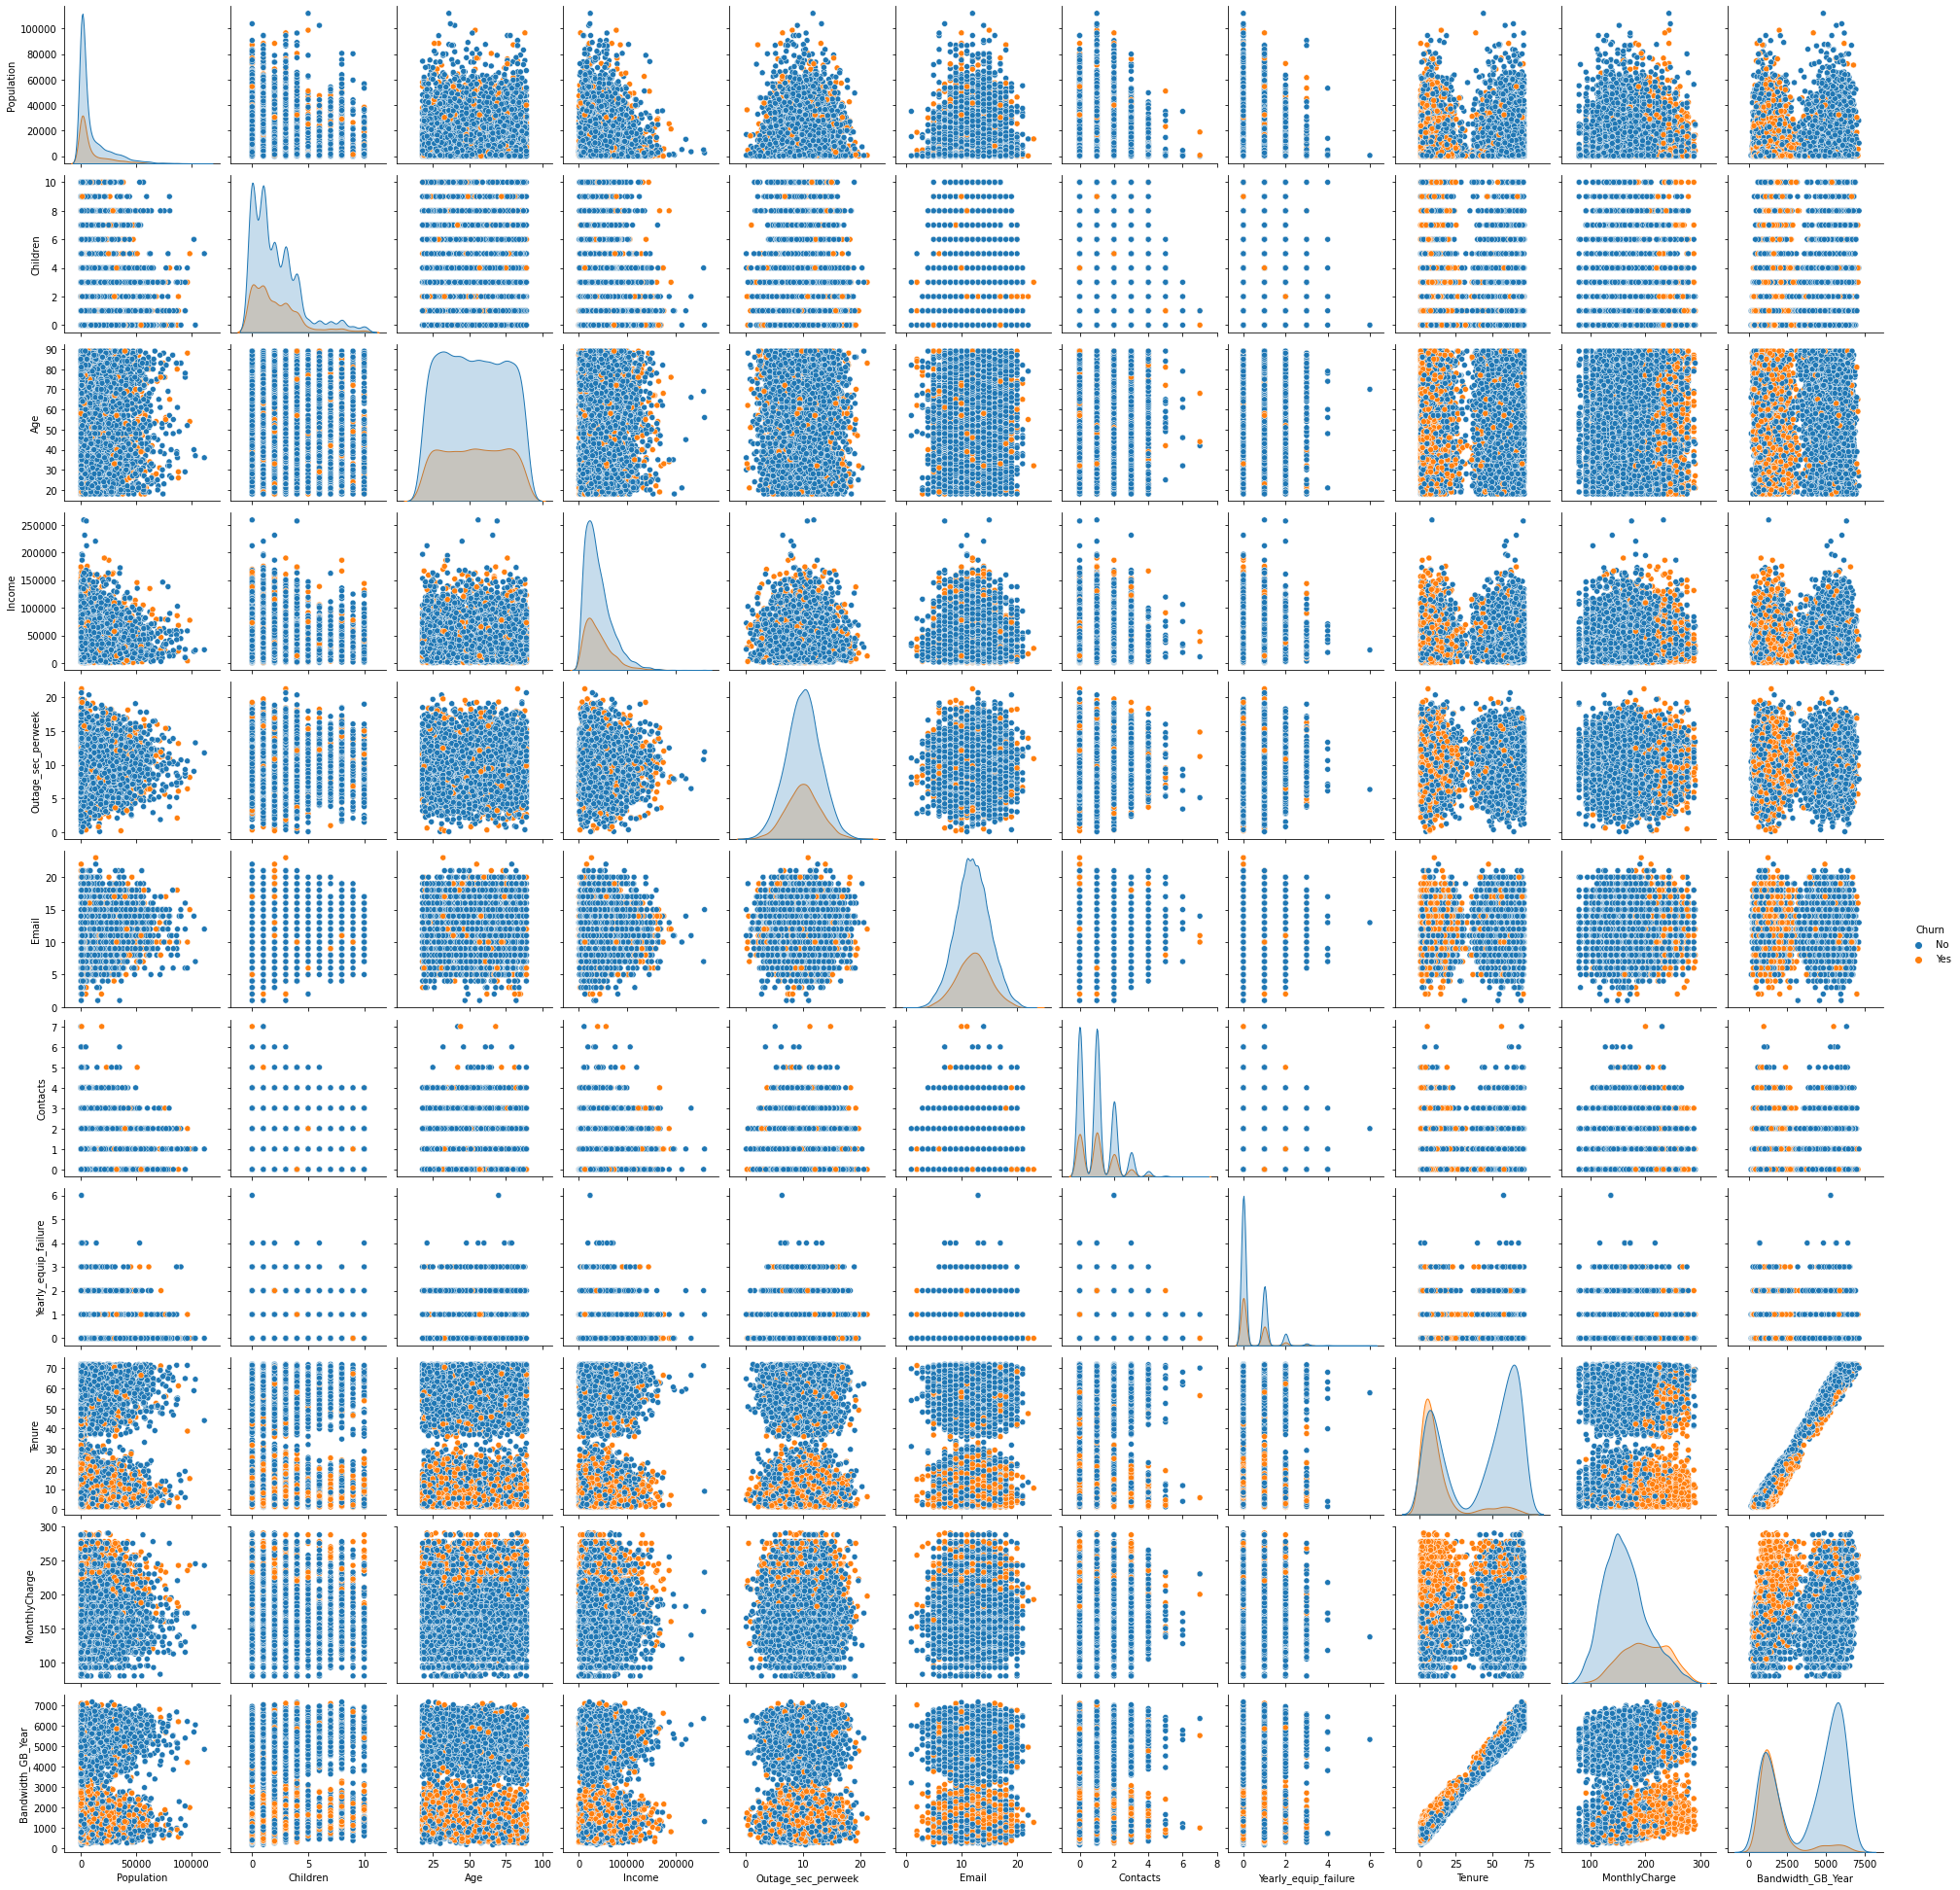

In [41]:
g = sns.pairplot(df, hue = 'Churn')

In [48]:
df.columns

Index(['State', 'Population', 'Area', 'Job', 'Children', 'Age', 'Income',
       'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

In [49]:
features = ['State','Area', 'Job', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'] 

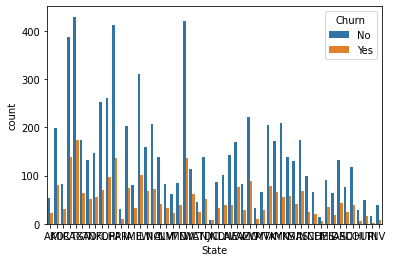

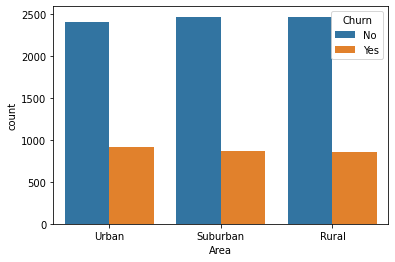

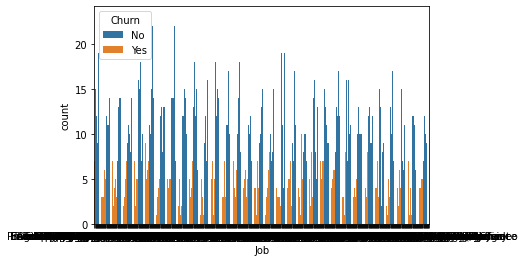

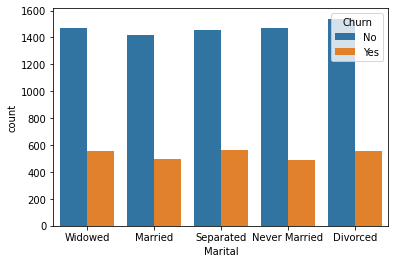

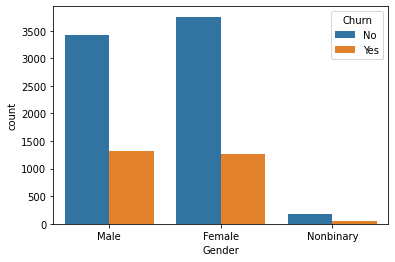

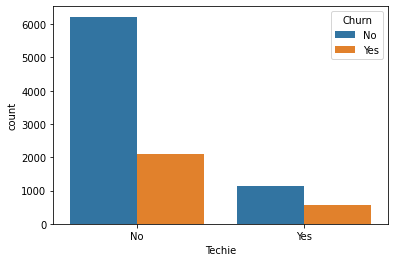

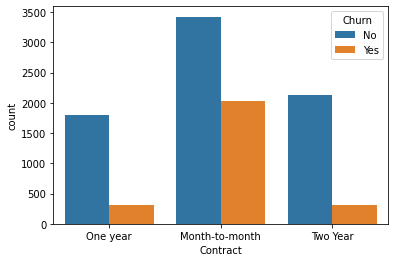

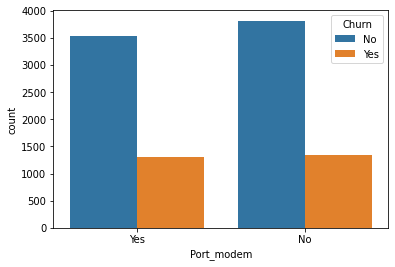

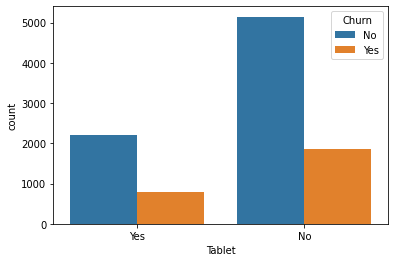

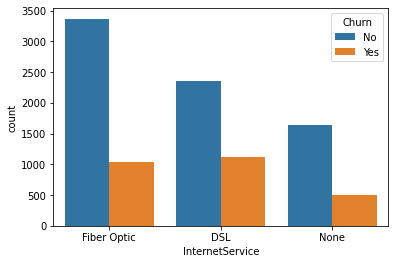

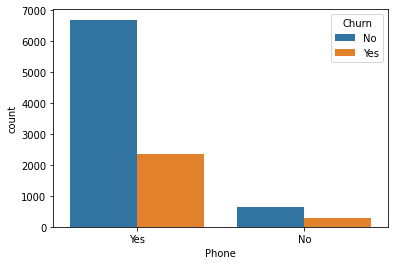

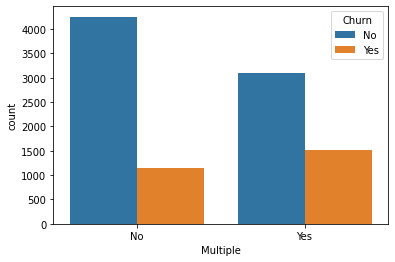

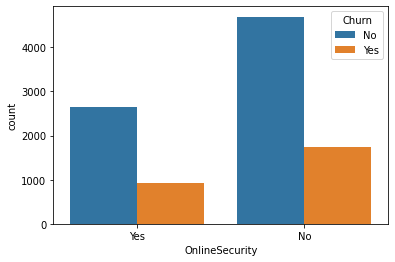

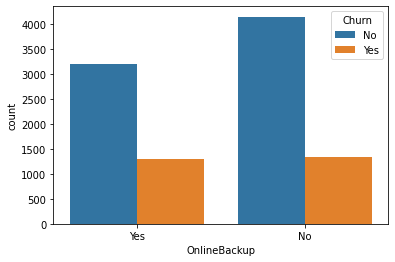

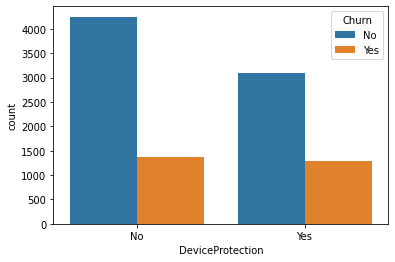

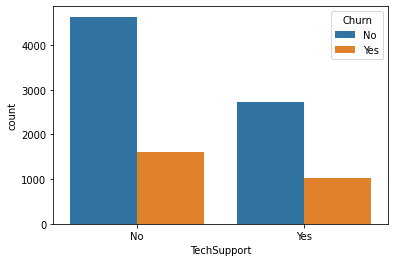

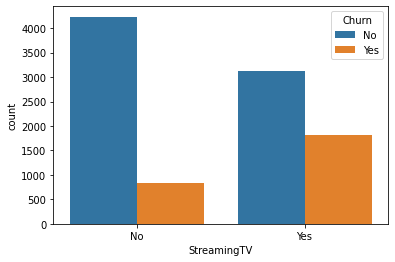

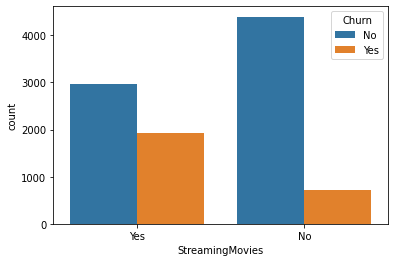

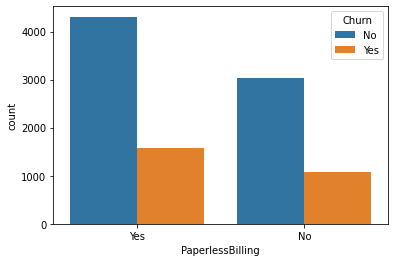

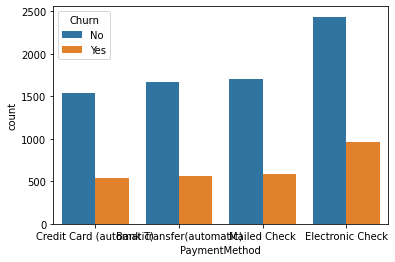

In [53]:
for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data = df, hue = 'Churn')

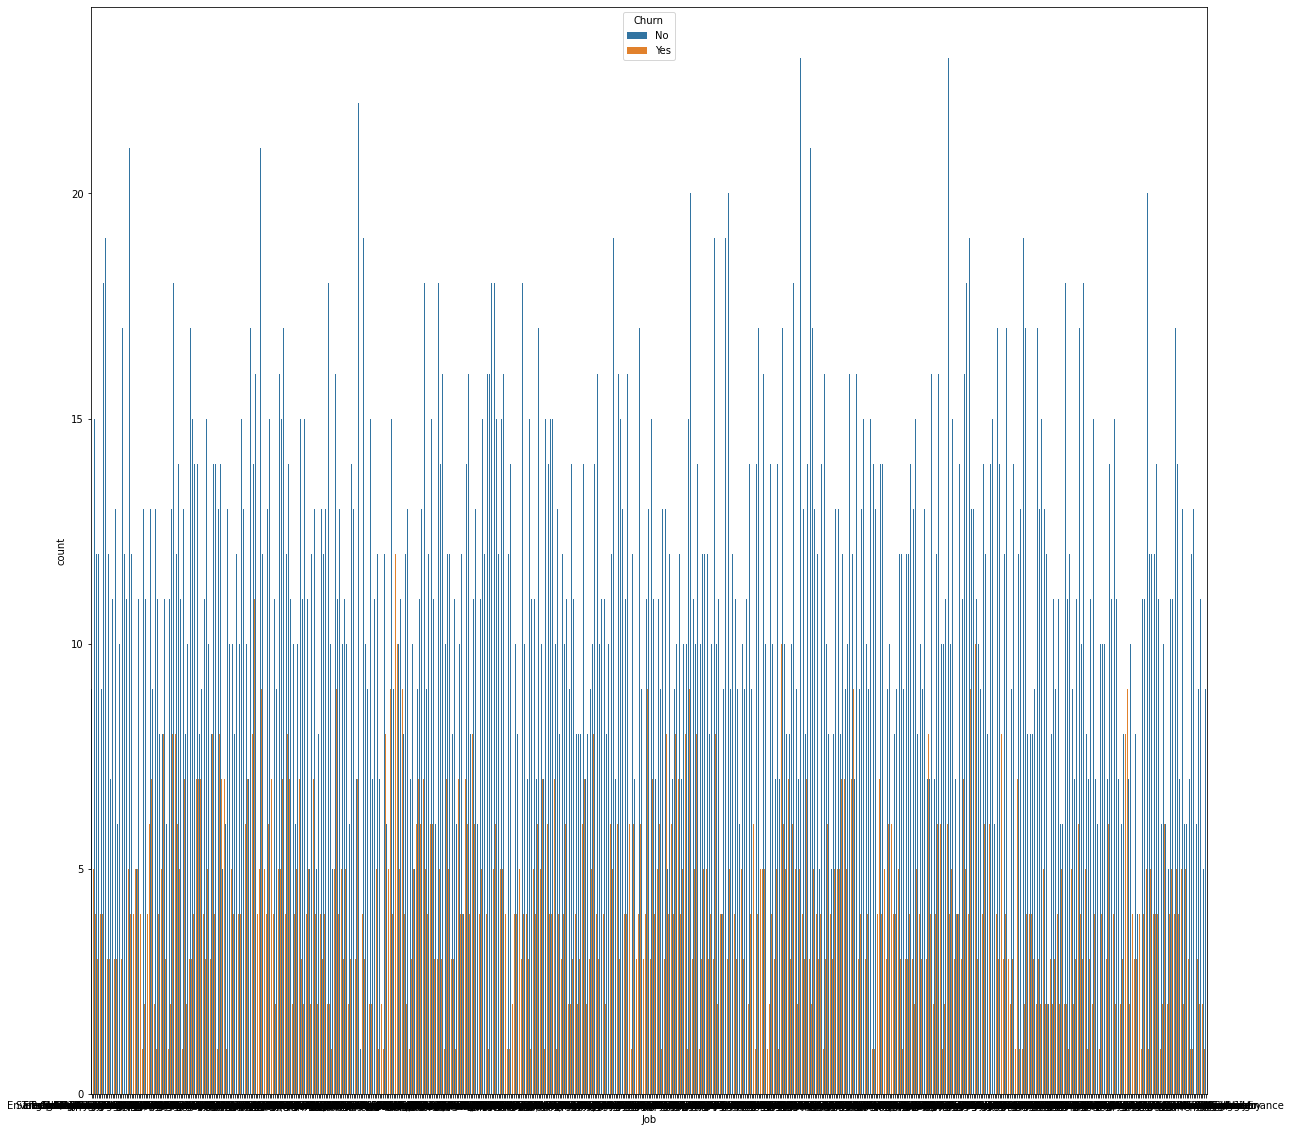

In [64]:
%matplotlib inline
plt.rcParams['figure.figsize']=20,20
ax = sns.countplot(x='Job', data = df, hue = 'Churn')

In [75]:

table = pd.pivot_table(df, values='Churn', index=['Job'],
                     aggfunc='count')
display(table)

Churn
Job                                    
Academic librarian                   20
Accommodation manager                18
Accountant, chartered                20
Accountant, chartered certified       6
Accountant, chartered management     12
...                                 ...
Water quality scientist              17
Web designer                         12
Wellsite geologist                   13
Writer                                9
Youth worker                         14

[639 rows x 1 columns]

###This was the pivot table that signified that the columns of job was going to be dropped

In [78]:
result = table.sort_values(('Churn'), ascending=False)

In [79]:
display(result)

Churn
Job                                        
Occupational psychologist                30
Hospital pharmacist                      28
Comptroller                              28
Horticultural therapist                  28
Special effects artist                   27
...                                     ...
Arboriculturist                           6
Control and instrumentation engineer      6
Toxicologist                              6
Travel agency manager                     6
Accountant, chartered certified           6

[639 rows x 1 columns]

In [82]:
df = df.drop(['Job'], axis = 1)

In [83]:
df.columns

Index(['State', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

In [84]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature State :52
The number of values for feature Population :5933
The number of values for feature Area :3 -- ['Rural' 'Suburban' 'Urban']
The number of values for feature Children :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Age :72
The number of values for feature Income :9993
The number of values for feature Marital :5 -- ['Divorced' 'Married' 'Never Married' 'Separated' 'Widowed']
The number of values for feature Gender :3 -- ['Female' 'Male' 'Nonbinary']
The number of values for feature Churn :2 -- ['No' 'Yes']
The number of values for feature Outage_sec_perweek :9986
The number of values for feature Email :23 -- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
The number of values for feature Contacts :8 -- [0 1 2 3 4 5 6 7]
The number of values for feature Yearly_equip_failure :6 -- [0 1 2 3 4 6]
The number of values for feature Techie :2 -- ['No' 'Yes']
The number of values for feature Contract :3 --

In [87]:
###checking to see if there are any null values in the columns
df.isnull().sum()

State                   0
Population              0
Area                    0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

In [89]:
print(df.shape)

(10000, 31)


In [91]:
df = pd.get_dummies(df)

In [92]:
###this now shows that after making the categorical variables into numeric, the colums increased exponentially
print(df.shape)

(10000, 110)


In [94]:
# Running Kmeans

X_train = df.values

# We wills start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [3 3 3 ... 1 0 3]
The Inertia is:  1951728888740.3455


In [95]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,40) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 4969813192836.911
The innertia for : 3 Clusters is: 3603948612462.044
The innertia for : 4 Clusters is: 2505243379241.5674
The innertia for : 5 Clusters is: 1951729190525.9375
The innertia for : 6 Clusters is: 1648911699434.7998
The innertia for : 7 Clusters is: 1396322267061.4988
The innertia for : 8 Clusters is: 1240487840906.176
The innertia for : 9 Clusters is: 1091174283226.8818
The innertia for : 10 Clusters is: 973731048024.2965
The innertia for : 11 Clusters is: 885320151610.9738
The innertia for : 12 Clusters is: 822295859786.7722
The innertia for : 13 Clusters is: 761393752140.6528
The innertia for : 14 Clusters is: 710747975361.8495
The innertia for : 15 Clusters is: 663999990089.6464
The innertia for : 16 Clusters is: 625304110381.5118
The innertia for : 17 Clusters is: 587240261833.6383
The innertia for : 18 Clusters is: 552600614696.404
The innertia for : 19 Clusters is: 525012112505.68506
The innertia for : 20 Clusters is: 495236783146.5

In [96]:
no_of_clusters

range(2, 40)

Text(0.5, 1.0, 'Inertia Plot per k')

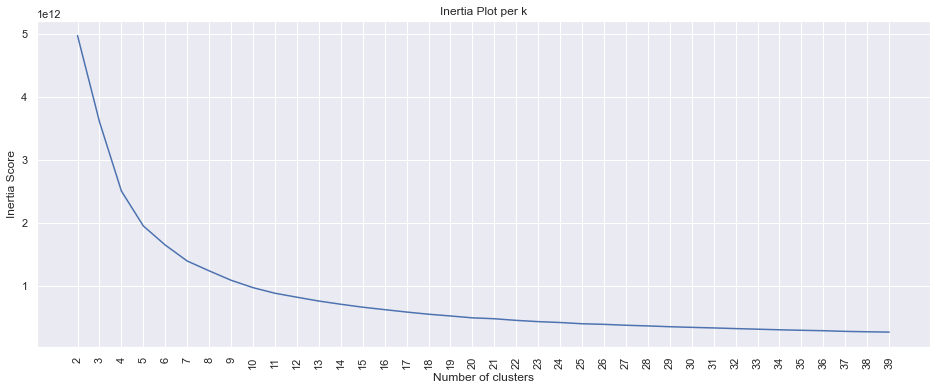

In [97]:

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

#The plot above shows us which is the best cluster amount to use

In [102]:

# Running K means on 5 clusters

kmeans = KMeans(n_clusters=7, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,7)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4","Cluster 5","Cluster 6"])

# display
countscldf

Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5  Cluster 6
0       2612       1026       1861        548        924       2724        305